<a href="https://colab.research.google.com/github/varvara007/yandex/blob/main/3_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%9D%D0%B5%D0%B4%D0%B2%D0%B8%D0%B6%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


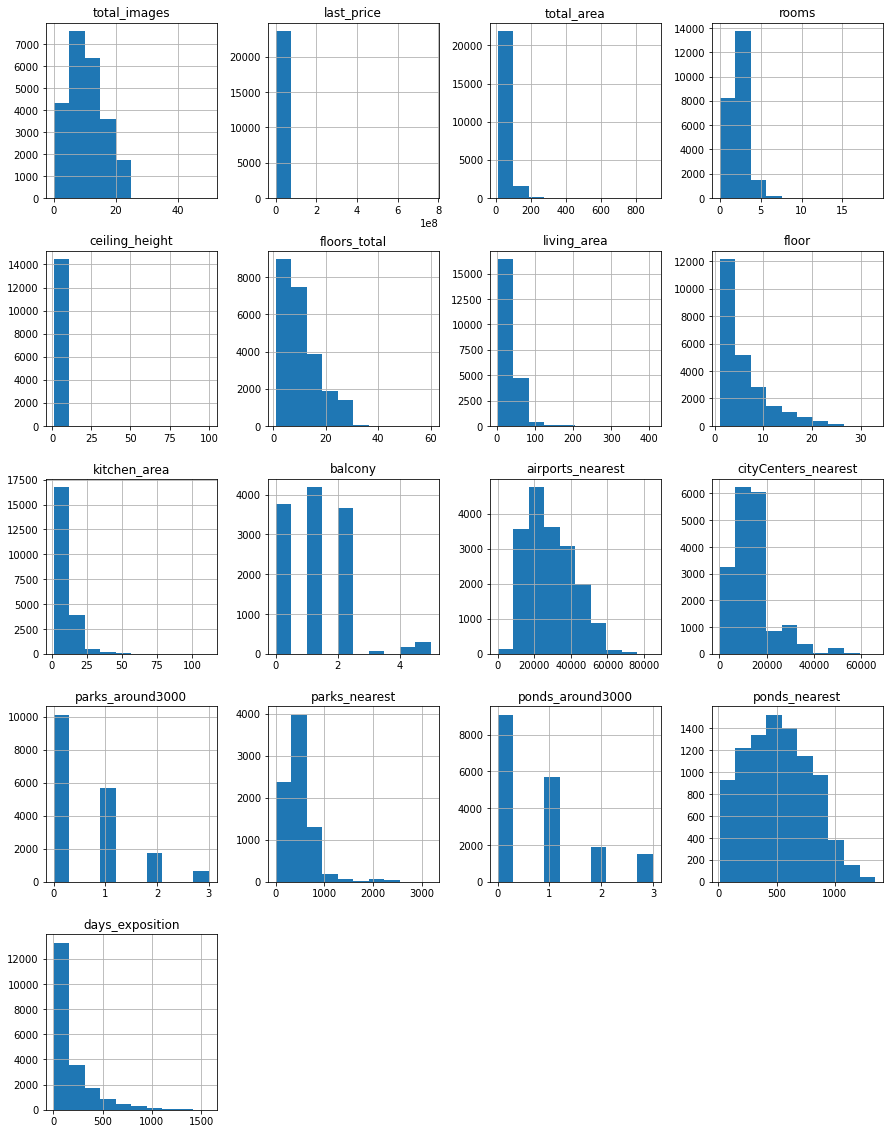

In [ ]:
data.hist(figsize=(15, 20));

Всего строк в датасете 23699. Больше половины параметров имеют пропуски. Данные описывают недвижимость. Каждый столбец является параметром квартиры.

### Выполните предобработку данных

In [ ]:
# Определение пропущенных значений
missing_values = data.isnull().sum()

# Вывод столбцов с пропущенными значениями
print(missing_values[missing_values > 0])

ceiling_height          9195
floors_total              86
living_area             1903
is_apartment           20924
kitchen_area            2278
balcony                11519
locality_name             49
airports_nearest        5542
cityCenters_nearest     5519
parks_around3000        5518
parks_nearest          15620
ponds_around3000        5518
ponds_nearest          14589
days_exposition         3181
dtype: int64


In [ ]:
# Заполнение NaN в столбце 'balcony' нулями
data['balcony'] = data['balcony'].fillna(0)


In [ ]:
missing_values = data.isnull().sum()

print(missing_values)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


#### Ceiling_height - высота потолка

Первый признак в котором встречается много пропусков является высота потолка. Разберем этот признак поподробнее и заполним пропуски.

In [ ]:
print(data['ceiling_height'].describe())

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


Максимальная высота потолка 100 метров. Очень трудно представить квартиру или дом с таким высоким потолком. Необходимо разобраться поподробнее.

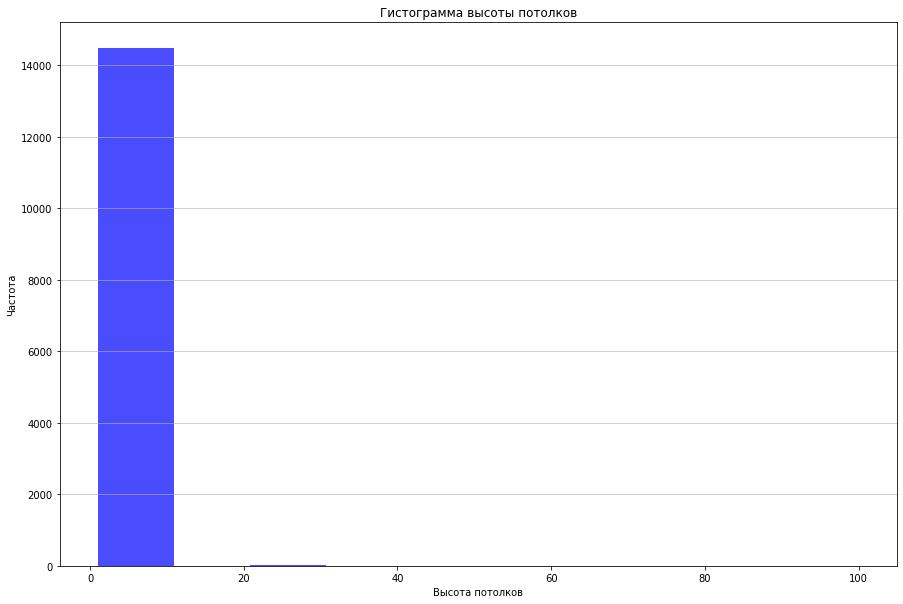

In [ ]:
plt.figure(figsize=(15, 10))
plt.hist(data['ceiling_height'], bins=10, color='blue', alpha=0.7)
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
high_ceiling_apartments = data[data['ceiling_height'] > 60]
display(high_ceiling_apartments)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


Видим, что квартира с высотой потолком больше 60 метров, только одна. Скорее всего, в данных по потолкам неверно стоит запятая. Для этого необходимо разделить все значения больше 20м разделить на 10.

In [ ]:
display(data.query('ceiling_height > 20'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,8.0,0.0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,...,5.5,0.0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,NaN,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.0,5.0,31.3,5,NaN,...,5.7,0.0,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,NaN,...,5.2,0.0,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


In [ ]:
index_ceiling_height = data.query('ceiling_height > 20').index
data.loc[index_ceiling_height, 'ceiling_height'] = data.loc[index_ceiling_height, 'ceiling_height'] / 10

     Удалим из датасета квартиры с высотой потолков больше 8 метров и ниже 2 метров.

In [ ]:
index_list = data.query('ceiling_height > 8 or ceiling_height < 2').index
data.drop(index_list, inplace=True, axis=0)
data.reset_index(inplace=True, drop=True)
print(data['ceiling_height'].describe())

count    14496.000000
mean         2.727765
std          0.288759
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          8.000000
Name: ceiling_height, dtype: float64


    Так как разброс высоты потолка достаточно большой от 2 м до 8 м, поэтому берем медиану в качестве заполнения пропусков.

In [ ]:
print(data['ceiling_height'].describe())
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
print("Кол-во пропусков =", data['ceiling_height'].isna().sum())
data['ceiling_height'].describe()

count    14496.000000
mean         2.727765
std          0.288759
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          8.000000
Name: ceiling_height, dtype: float64
Кол-во пропусков = 0


count    23691.000000
mean         2.697583
std          0.229029
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.000000
Name: ceiling_height, dtype: float64

In [ ]:
missing_values = data.isnull().sum()

print(missing_values)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20917
studio                      0
open_plan                   0
kitchen_area             2277
balcony                     0
locality_name              49
airports_nearest         5541
cityCenters_nearest      5518
parks_around3000         5517
parks_nearest           15616
ponds_around3000         5517
ponds_nearest           14586
days_exposition          3180
dtype: int64


#### Floors_total - количество этажей всего


In [ ]:
print(data['floors_total'].describe())

count    23605.000000
mean        10.672400
std          6.595368
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


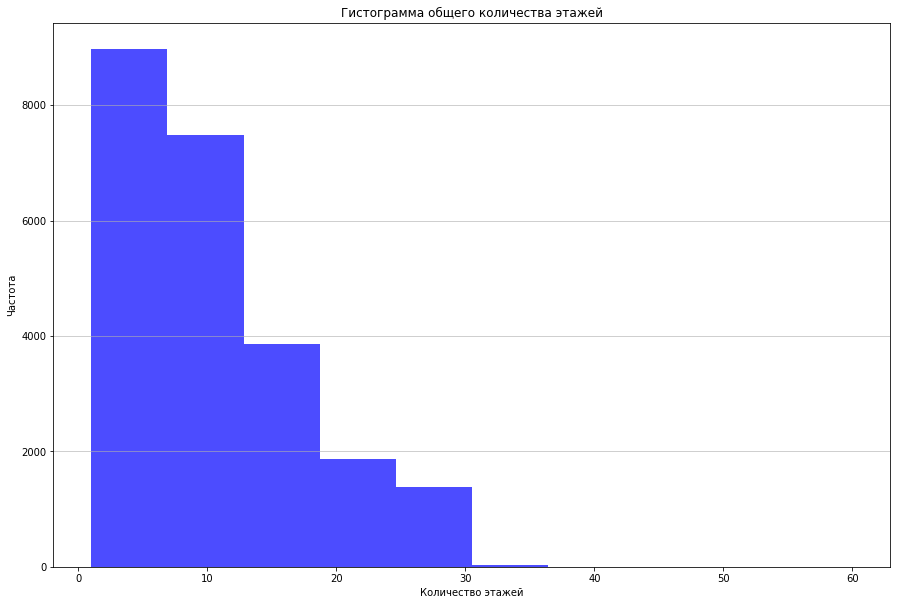

In [ ]:
plt.figure(figsize=(15, 10))
plt.hist(data['floors_total'], bins=10, color='blue', alpha=0.7)
plt.title('Гистограмма общего количества этажей')
plt.xlabel('Количество этажей')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
high_apartments = data[data['floors_total'] > 40]
display(high_apartments)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,NaN,...,7.4,0.0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16728,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52.0,10.5,18,NaN,...,14.0,0.0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


Недвижимость в домах выше 40 этаж, встретилась дважды: дом 60 этажей, дом 52 этажа. В Санкт-Петербурге есть такие высокие жилые дома. Поэтому удалять в качестве аномалий нет необходимости. Так как трудно предугадать какое количество этажей в доме, удалим строчки с пропущенным количеством этажей, так как если добавим с помощью медианы, исчезнет информация о том, находится ли квартира на последнем этаже, или если в здании только один этаж, а в данных будет из-за медианы 9.

In [ ]:
data = data.dropna(subset=['floors_total'])

In [ ]:
print("Кол-во пропусков =", data['floors_total'].isna().sum())
data['floors_total'].describe()

Кол-во пропусков = 0


count    23605.000000
mean        10.672400
std          6.595368
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [ ]:
missing_values = data.isnull().sum()

print(missing_values)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1870
floor                       0
is_apartment            20831
studio                      0
open_plan                   0
kitchen_area             2230
balcony                     0
locality_name              48
airports_nearest         5531
cityCenters_nearest      5508
parks_around3000         5507
parks_nearest           15564
ponds_around3000         5507
ponds_nearest           14549
days_exposition          3171
dtype: int64


#### living_area -  Жилая площадь

In [ ]:
print(data['living_area'].describe())

count    21735.000000
mean        34.465726
std         22.039706
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


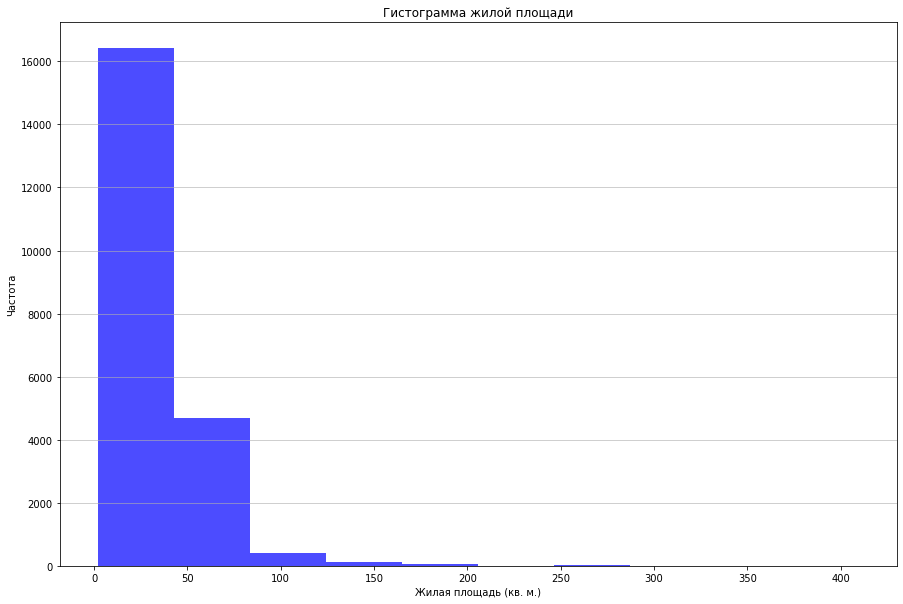

In [ ]:
plt.figure(figsize=(15, 10))
plt.hist(data['living_area'], bins=10, color='blue', alpha=0.7)
plt.title('Гистограмма жилой площади')
plt.xlabel('Жилая площадь (кв. м.)')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

Средняя площадь комнат 15 кв.м. Заполним пропуски, используя этот коэффицент, умножив его на количество комнат в квартире.

In [ ]:
#data['living_area'] = data['living_area'].fillna(data['living_area'].median())
data['living_area'] = data['living_area'].fillna(data['rooms'] * 15)

In [ ]:
missing_values = data.isnull().sum()

print(missing_values)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20831
studio                      0
open_plan                   0
kitchen_area             2230
balcony                     0
locality_name              48
airports_nearest         5531
cityCenters_nearest      5508
parks_around3000         5507
parks_nearest           15564
ponds_around3000         5507
ponds_nearest           14549
days_exposition          3171
dtype: int64


#### is_apartment

In [ ]:
print(data['is_apartment'].describe())

count      2774
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object


In [ ]:
print(data['is_apartment'].head())
data['is_apartment'].value_counts()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: is_apartment, dtype: object


False    2725
True       49
Name: is_apartment, dtype: int64

    Достаточно большое количество пропусков - 20917, из которых не апартаменты - 2725, апартаменты - 49. Заполним пропуски значением False. Также тип переменной int64, более логично заменить на bool

In [ ]:
data.loc[data['is_apartment'] != True, 'is_apartment'] = False
data['is_apartment'] = data['is_apartment'].astype('bool')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23605 entries, 0 to 23690
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23605 non-null  int64  
 1   last_price            23605 non-null  float64
 2   total_area            23605 non-null  float64
 3   first_day_exposition  23605 non-null  object 
 4   rooms                 23605 non-null  int64  
 5   ceiling_height        23605 non-null  float64
 6   floors_total          23605 non-null  float64
 7   living_area           23605 non-null  float64
 8   floor                 23605 non-null  int64  
 9   is_apartment          23605 non-null  bool   
 10  studio                23605 non-null  bool   
 11  open_plan             23605 non-null  bool   
 12  kitchen_area          21375 non-null  float64
 13  balcony               23605 non-null  float64
 14  locality_name         23557 non-null  object 
 15  airports_nearest   

In [ ]:
missing_values = data.isnull().sum()

print(missing_values)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2230
balcony                     0
locality_name              48
airports_nearest         5531
cityCenters_nearest      5508
parks_around3000         5507
parks_nearest           15564
ponds_around3000         5507
ponds_nearest           14549
days_exposition          3171
dtype: int64


#### kitchen_area - площадь кухни

In [ ]:
print(data['kitchen_area'].describe())

count    21375.000000
mean        10.564596
std          5.905110
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


Размер кухни также достаточно разбросан в диапазоне,от 1 кв м до 112 кв.м . Обычно кухня занимает 6-15 % площади квартиры. Заполним пропуски, используя известную площадь квартиры, умножим на коэффициент. Возьмем 10 % от всей площади квартиры.

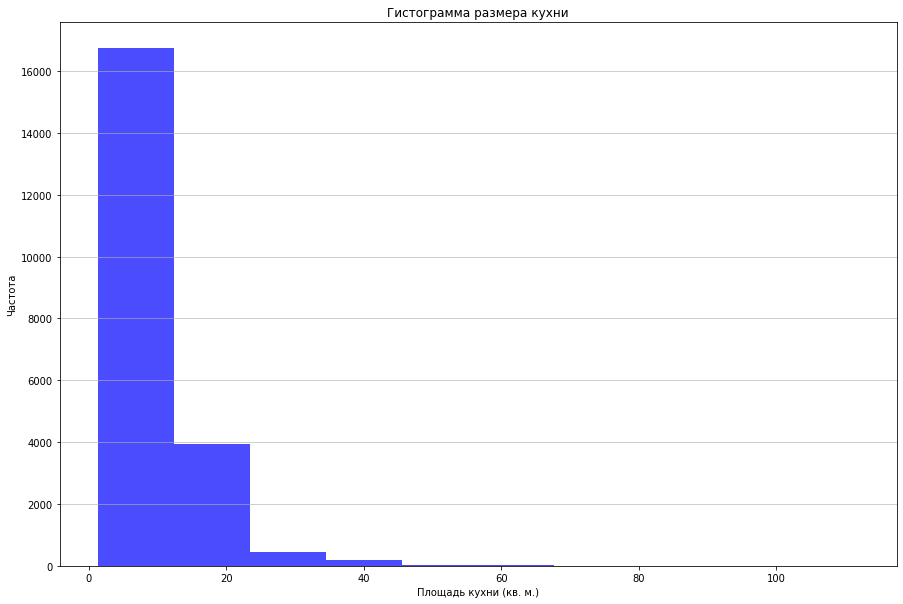

In [ ]:
plt.figure(figsize=(15, 10))
plt.hist(data['kitchen_area'], bins=10, color='blue', alpha=0.7)
plt.title('Гистограмма размера кухни')
plt.xlabel('Площадь кухни (кв. м.)')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']* 0.1)
missing_values = data.isnull().sum()
print(missing_values)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              48
airports_nearest         5531
cityCenters_nearest      5508
parks_around3000         5507
parks_nearest           15564
ponds_around3000         5507
ponds_nearest           14549
days_exposition          3171
dtype: int64


In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23605.000000,2.360500e+04,23605.000000,23605.000000,23605.000000,23605.000000,23605.000000,23605.000000,23605.000000,23605.000000,18074.000000,18097.000000,18098.000000,8041.000000,18098.000000,9056.000000,20434.000000
mean,9.873628,6.540660e+06,60.344094,2.071298,2.697707,10.672400,34.183756,5.876509,10.101767,0.592713,28789.902457,14185.357573,0.611338,490.559508,0.769809,518.334143,180.906871
std,5.680650,1.090336e+07,35.652922,1.078455,0.229416,6.595368,21.633299,4.873310,5.934873,0.959534,12626.873355,8615.503385,0.802141,341.359630,0.938839,277.865514,219.709936
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.200000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.400000,2.000000,6.700000,0.000000,18576.000000,9233.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26727.500000,13092.000000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.799000e+06,69.800000,3.000000,2.700000,16.000000,42.700000,8.000000,11.500000,1.000000,37244.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,8.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### locality_name

In [ ]:
print("Кол-во пропущеных значений", data['locality_name'].isna().sum())
display(data['locality_name'].sort_values().unique())

Кол-во пропущеных значений 48


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Количество пропущенных значений 48.

In [ ]:
data = data.dropna(subset = ['locality_name'])
missing_values = data.isnull().sum()

print(missing_values)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5523
cityCenters_nearest      5500
parks_around3000         5499
parks_nearest           15531
ponds_around3000         5499
ponds_nearest           14526
days_exposition          3170
dtype: int64


In [ ]:
data['locality_name'] = data['locality_name'].str.lower()

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')

In [ ]:
data['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'посёлок городского типа красный бор', 'гатчина',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'посёлок молодцово',
       'посёлок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'посёлок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'посёлок торковичи', 'посёлок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'посёлок новый свет

Первые 10 районов:
санкт-петербург      15644
посёлок мурино         552
посёлок шушары         439
всеволожск             398
пушкин                 369
колпино                338
посёлок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: locality_name, dtype: int64


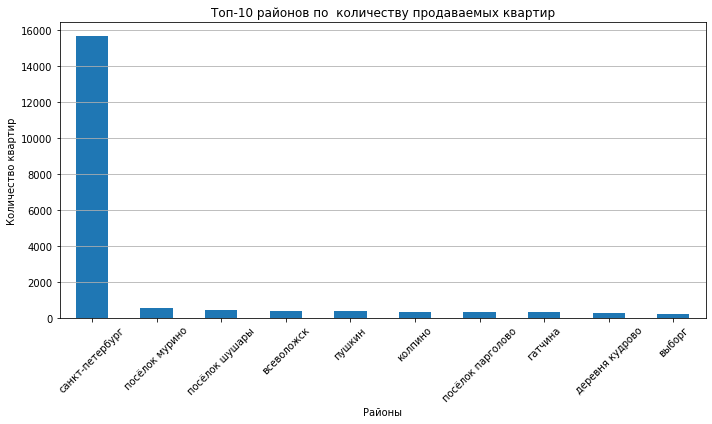

In [ ]:
# Подсчет количества квартир по районам
locality_counts = data['locality_name'].value_counts()

# Получаем первые 10 районов с количеством квартир
top_10_localities = locality_counts.head(10)

# Выводим результат
print("Первые 10 районов:")
print(top_10_localities)

# Построение диаграммы для первых 10 районов
plt.figure(figsize=(10, 6))
top_10_localities.plot(kind='bar')
plt.title('Топ-10 районов по  количеству продаваемых квартир')
plt.xlabel('Районы')
plt.ylabel('Количество квартир')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Показать диаграмму
plt.tight_layout()
plt.show()

Устраним неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Заменим городской посёлок на посёлок.

In [ ]:
# Замена 'посёлок городского типа' на 'посёлок'
data['locality_name'] = data['locality_name'].str.replace('городской посёлок', 'посёлок', regex=False)
print(data['locality_name'].unique())

['санкт-петербург' 'посёлок шушары' 'посёлок янино-1' 'посёлок парголово'
 'посёлок мурино' 'ломоносов' 'сертолово' 'петергоф' 'пушкин'
 'деревня кудрово' 'коммунар' 'колпино'
 'посёлок городского типа красный бор' 'гатчина' 'деревня фёдоровское'
 'выборг' 'кронштадт' 'кировск' 'деревня новое девяткино'
 'посёлок металлострой' 'посёлок городского типа лебяжье'
 'посёлок городского типа сиверский' 'посёлок молодцово'
 'посёлок городского типа кузьмоловский'
 'садовое товарищество новая ропша' 'павловск' 'деревня пикколово'
 'всеволожск' 'волхов' 'кингисепп' 'приозерск' 'сестрорецк'
 'деревня куттузи' 'посёлок аннино' 'посёлок городского типа ефимовский'
 'посёлок плодовое' 'деревня заклинье' 'посёлок торковичи'
 'посёлок первомайское' 'красное село' 'посёлок понтонный' 'сясьстрой'
 'деревня старая' 'деревня лесколово' 'посёлок новый свет' 'сланцы'
 'село путилово' 'ивангород' 'мурино' 'шлиссельбург' 'никольское'
 'зеленогорск' 'сосновый бор' 'деревня оржицы' 'деревня кальтино'
 'кудрово

#### airports-nearest - близость к аэропорту

In [ ]:
data['airports_nearest'].describe()

count    18034.000000
mean     28798.984696
std      12633.165350
min          0.000000
25%      18573.000000
50%      26757.000000
75%      37274.500000
max      84869.000000
Name: airports_nearest, dtype: float64

    Минимальное расстояние до аэропорта 0 м. Выведем эту ячейку и удалим ее.

In [ ]:
display(data[data['airports_nearest']==0])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21080,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.7,9.0,19.8,3,False,...,6.0,2.0,санкт-петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


In [ ]:
# Удаление строки с индексом 21080
data = data.drop(index=21080)

# Обновление индексов
data = data.reset_index(drop=True)

In [ ]:
data['airports_nearest'].describe()

count    18033.000000
mean     28800.581711
std      12631.695056
min       6450.000000
25%      18573.000000
50%      26757.000000
75%      37275.000000
max      84869.000000
Name: airports_nearest, dtype: float64

    Минимальное расстояние стало больше 0.

In [ ]:
missing_values = data.isnull().sum()

print(missing_values)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5523
cityCenters_nearest      5500
parks_around3000         5499
parks_nearest           15530
ponds_around3000         5499
ponds_nearest           14525
days_exposition          3170
dtype: int64


Большое количество пропусков 5531, их трудно заполнить медианой или среднем значением, так как это сильно повлияет на анализ.

   #### cityCenters_nearest

    Изменим название столбца на более читаемое.

In [ ]:
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23556 entries, 0 to 23555
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23556 non-null  int64  
 1   last_price            23556 non-null  float64
 2   total_area            23556 non-null  float64
 3   first_day_exposition  23556 non-null  object 
 4   rooms                 23556 non-null  int64  
 5   ceiling_height        23556 non-null  float64
 6   floors_total          23556 non-null  float64
 7   living_area           23556 non-null  float64
 8   floor                 23556 non-null  int64  
 9   is_apartment          23556 non-null  bool   
 10  studio                23556 non-null  bool   
 11  open_plan             23556 non-null  bool   
 12  kitchen_area          23556 non-null  float64
 13  balcony               23556 non-null  float64
 14  locality_name         23556 non-null  object 
 15  airports_nearest   

city_centres_nearest также достаточно много пропусков - 5508, заполнение медианой и средним значением не даст качественного анализа.

#### parks_around3000 и parks_nearest

In [ ]:
data['parks_around3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

Можно предположить, что nan означает просто отсутствие парка.

In [ ]:
import numpy as np
data['parks_around3000'] = np.where(data['parks_nearest'] > 3000, 0, data['parks_around3000'].fillna(0)).astype('int')

In [ ]:
missing_values = data.isnull().sum()

print(missing_values)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5523
city_centers_nearest     5500
parks_around3000            0
parks_nearest           15530
ponds_around3000         5499
ponds_nearest           14525
days_exposition          3170
dtype: int64


In [ ]:
data['parks_nearest'].describe()

count    8026.000000
mean      490.585348
std       341.596033
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Попробуем заменить пропущенные значение медианным, но с условием больше 3000м.

In [ ]:
median_value = data['parks_nearest'].median()
data.loc[(data['parks_nearest'].isna()) & (data['parks_around3000'] > 0), 'parks_nearest'] = median_value
missing_values = data.isnull().sum()

print(missing_values)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5523
city_centers_nearest     5500
parks_around3000            0
parks_nearest           15530
ponds_around3000         5499
ponds_nearest           14525
days_exposition          3170
dtype: int64


#### ponds_around3000 и ponds_nearest

In [ ]:
data['ponds_around3000'].unique()

array([ 2.,  0.,  3.,  1., nan])

In [ ]:
# Сначала фильтруем строки, где p_nearest является NaN
filtered_data = data[data['ponds_nearest'].isna()]

# Затем получаем распределение значений в столбце p_around3000
value_counts = filtered_data['ponds_around3000'].value_counts()
display(value_counts)

0.0    9026
Name: ponds_around3000, dtype: int64

Таким же образом заменим пропущенные значение на 0, как отсутствие пруда.

In [ ]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')

In [ ]:
data['ponds_nearest'].describe()

count    9031.000000
mean      518.414572
std       277.987564
min        13.000000
25%       293.000000
50%       503.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [ ]:
median_value = data['ponds_nearest'].median()
data.loc[(data['ponds_nearest'].isna()) & (data['ponds_around3000'] > 0), 'ponds_nearest'] = median_value
missing_values = data.isnull().sum()

print(missing_values)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5523
city_centers_nearest     5500
parks_around3000            0
parks_nearest           15530
ponds_around3000            0
ponds_nearest           14525
days_exposition          3170
dtype: int64


In [ ]:
data['ponds_nearest'].describe()

count    9031.000000
mean      518.414572
std       277.987564
min        13.000000
25%       293.000000
50%       503.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

Также как и с парками, произошла какая-то ошибка с данными,так как большинство квартир, у которых нет в радиусе 3км ни озера, ни парка, не имеют ближайшего расстояния до них.

#### days_exposition

Пропуски связаны с тем, что пользователь еще не закрыл объявление о продаже.

#    Вывод
В результате обработки данных было выяснено, что значительная часть информации,которая влияет на итоговую статистику и принятие решений о покупке квартир, была потеряна при выгрузке таблицы или же отсутствует. Было проведено заполнение данных с помощью медиан  и средних значений.

### Добавьте в таблицу новые столбцы

#### Найдем цену одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);

In [ ]:
data['square_meter_price'] = data['last_price']/data['total_area']
data['square_meter_price'] = data['square_meter_price'].astype(int).round(3)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23556 entries, 0 to 23555
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23556 non-null  int64  
 1   last_price            23556 non-null  float64
 2   total_area            23556 non-null  float64
 3   first_day_exposition  23556 non-null  object 
 4   rooms                 23556 non-null  int64  
 5   ceiling_height        23556 non-null  float64
 6   floors_total          23556 non-null  float64
 7   living_area           23556 non-null  float64
 8   floor                 23556 non-null  int64  
 9   is_apartment          23556 non-null  bool   
 10  studio                23556 non-null  bool   
 11  open_plan             23556 non-null  bool   
 12  kitchen_area          23556 non-null  float64
 13  balcony               23556 non-null  float64
 14  locality_name         23556 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,0.0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,2.0,посёлок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,0.0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,45.0,9,False,...,0.0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,0.0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000


In [ ]:
print('Средняя цена за 1 кв.м:',data['square_meter_price'].mean())
print('Медианная цена за 1 кв.м:',data['square_meter_price'].median())
print('Минимальная цена за 1 кв.м:', data['square_meter_price'].min())
print('Максимальная цена за 1 кв.м:', data['square_meter_price'].max())

Средняя цена за 1 кв.м: 99381.25883002208
Медианная цена за 1 кв.м: 95000.0
Минимальная цена за 1 кв.м: 111
Максимальная цена за 1 кв.м: 1907500


# Вывод:
    Средняя и медианная цена за квадратный метр почти совпадают.

#### Далее найдем:

    день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

    месяц публикации объявления;

    год публикации объявления;

    Для начала преобразуем в другой тип данных first_day_exposition

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
display(data['first_day_exposition'].head(5))

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

In [ ]:
data['day_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year
display(data[['day_exposition', 'month_exposition', 'year_exposition']].head(10))
data.info()
data.head()

,day_exposition,month_exposition,year_exposition
0,3,3,2019
1,1,12,2018
2,3,8,2015
3,4,7,2015
4,1,6,2018
5,0,9,2018
6,3,11,2017
7,3,4,2019
8,2,5,2018
9,6,2,2017


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23556 entries, 0 to 23555
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23556 non-null  int64         
 1   last_price            23556 non-null  float64       
 2   total_area            23556 non-null  float64       
 3   first_day_exposition  23556 non-null  datetime64[ns]
 4   rooms                 23556 non-null  int64         
 5   ceiling_height        23556 non-null  float64       
 6   floors_total          23556 non-null  float64       
 7   living_area           23556 non-null  float64       
 8   floor                 23556 non-null  int64         
 9   is_apartment          23556 non-null  bool          
 10  studio                23556 non-null  bool          
 11  open_plan             23556 non-null  bool          
 12  kitchen_area          23556 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1,482.0,2,755.0,NaN,120370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,18603.0,0,NaN,0,NaN,81.0,82920,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,13933.0,1,90.0,2,574.0,558.0,92785,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,6800.0,2,84.0,3,234.0,424.0,408176,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2,112.0,1,48.0,121.0,100000,1,6,2018


In [ ]:
data['year_exposition'].value_counts()

2018    8481
2017    8158
2019    2870
2016    2745
2015    1166
2014     136
Name: year_exposition, dtype: int64

    Вывод:
    Количество предложений на рынке недвижимости имело пиковое значение в 2017 и 2018 годах, в 2019 количество предложений сократилось в 4 раза и приблизилось к уровенью 2016 года.

#### Найдем тип этажа квартиры (значения — «первый», «последний», «другой»)

In [ ]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_exposition,month_exposition,year_exposition,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1,482.0,2,755.0,NaN,120370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0,NaN,0,NaN,81.0,82920,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,1,90.0,2,574.0,558.0,92785,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,2,84.0,3,234.0,424.0,408176,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,2,112.0,1,48.0,121.0,100000,1,6,2018,другой


####  Расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

In [ ]:
def convert_m_to_km(distance_m):
    distance_km = distance_m / 1000
    return round(distance_km)
data['distance_km'] = convert_m_to_km(data['city_centers_nearest'])
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_exposition,month_exposition,year_exposition,floor_type,distance_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2,755.0,NaN,120370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,NaN,0,NaN,81.0,82920,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,2,574.0,558.0,92785,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,84.0,3,234.0,424.0,408176,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1,48.0,121.0,100000,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

 #### Анализ общей площади

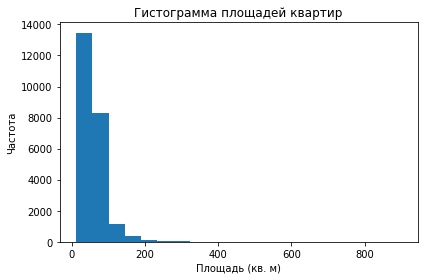

In [ ]:
plt.hist(data['total_area'], bins=20)
plt.title('Гистограмма площадей квартир')
plt.xlabel('Площадь (кв. м)')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Площадь (кв. м)')

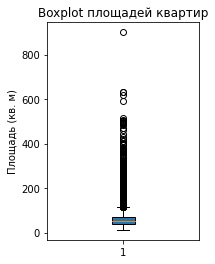

In [ ]:
# Построение boxplot
plt.subplot(1, 2, 2)
plt.boxplot(data['total_area'], vert=True, patch_artist=True)
plt.title('Boxplot площадей квартир')
plt.ylabel('Площадь (кв. м)')

Удалим выбросы  у столбца total_area

In [ ]:
data = data[data['total_area'] < 200]

In [ ]:
data['total_area'].describe()

count    23326.000000
mean        58.130334
std         26.451706
min         12.000000
25%         40.000000
50%         51.700000
75%         68.800000
max        199.200000
Name: total_area, dtype: float64

In [ ]:
data['last_price'].describe()

count    2.332600e+04
mean     6.019451e+06
std      6.236905e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.699000e+06
max      3.300000e+08
Name: last_price, dtype: float64

Text(0, 0.5, 'миллион рублей')

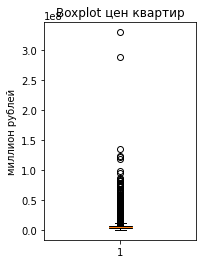

In [ ]:
# Построение boxplot last_price
plt.subplot(1, 2, 2)
plt.boxplot(data['last_price'], vert=True, patch_artist=True)
plt.title('Boxplot цен квартир')
plt.ylabel('миллион рублей')

Удалим выбросы у цены.

In [ ]:
data = data[data['last_price'] < 20000000]

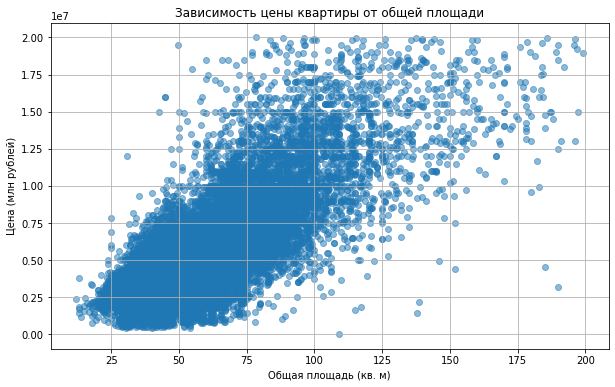

In [ ]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(data['total_area'], data['last_price'], alpha=0.5)
plt.title('Зависимость цены квартиры от общей площади')
plt.xlabel('Общая площадь (кв. м)')
plt.ylabel('Цена (млн рублей)')
plt.grid(True)

# Отображение графика
plt.show()

In [ ]:
# Вычисление корреляции между общей площадью и ценой
correlation = data['total_area'].corr(data['last_price'])

# Вывод результата
print(f'Корреляция между общей площадью и ценой: {correlation}')

Корреляция между общей площадью и ценой: 0.7742814692311324


# Вывод:
Судя по графикам, можно сделать вывод о том, что существует связь между ценой за квартиры и площадью. Чем больше недвижимость в кв.м, тем дороже она стоит. Этот вывод подтверждает достаточно высокий коэффициент корреляции.

#### Жилая площадь

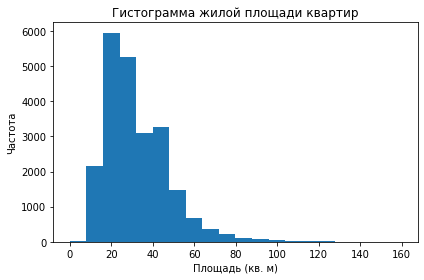

In [ ]:
plt.hist(data['living_area'], bins=20)
plt.title('Гистограмма жилой площади квартир')
plt.xlabel('Площадь (кв. м)')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Площадь (кв. м)')

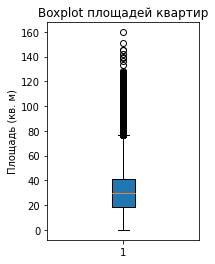

In [ ]:
# Построение boxplot
plt.subplot(1, 2, 2)
plt.boxplot(data['living_area'], vert=True, patch_artist=True)
plt.title('Boxplot площадей квартир')
plt.ylabel('Площадь (кв. м)')

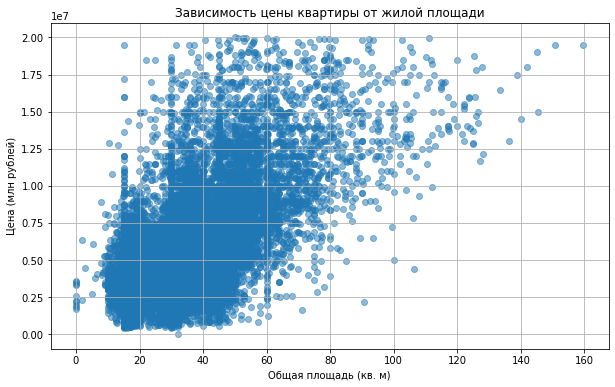

In [ ]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(data['living_area'], data['last_price'], alpha=0.5)
plt.title('Зависимость цены квартиры от жилой площади')
plt.xlabel('Общая площадь (кв. м)')
plt.ylabel('Цена (млн рублей)')
plt.grid(True)

# Отображение графика
plt.show()

In [ ]:
# Вычисление корреляции между общей площадью и ценой
correlation = data['living_area'].corr(data['last_price'])

print(f'Корреляция между жилой площадью и ценой: {correlation}')

Корреляция между жилой площадью и ценой: 0.642527492689366


# Вывод
Судя по графикам, можно сделать вывод о том, что существует связь между ценой за квартиры и жилой площадью. Чем больше жилая площадь в кв.м, тем дороже она стоит. Этот вывод подтверждает достаточно высокий коэффициент корреляции.

#### Площадь кухни

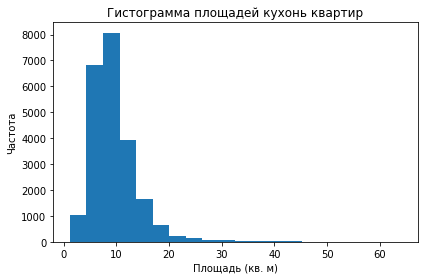

In [ ]:
plt.hist(data['kitchen_area'], bins=20)
plt.title('Гистограмма площадей кухонь квартир')
plt.xlabel('Площадь (кв. м)')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Площадь (кв. м)')

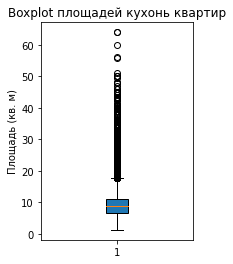

In [ ]:
# Построение boxplot
plt.subplot(1, 2, 2)
plt.boxplot(data['kitchen_area'], vert=True, patch_artist=True)
plt.title('Boxplot площадей кухонь квартир')
plt.ylabel('Площадь (кв. м)')

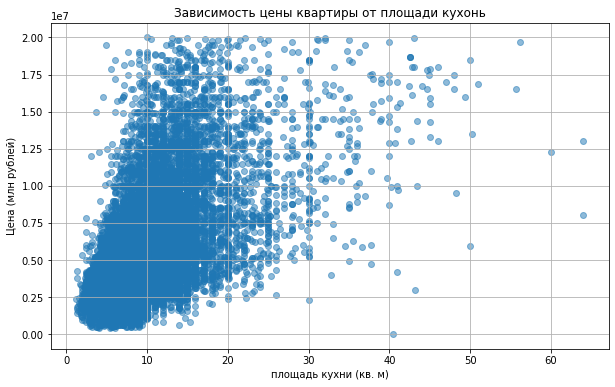

In [ ]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(data['kitchen_area'], data['last_price'], alpha=0.5)
plt.title('Зависимость цены квартиры от площади кухонь')
plt.xlabel('площадь кухни (кв. м)')
plt.ylabel('Цена (млн рублей)')
plt.grid(True)

# Отображение графика
plt.show()

In [ ]:
# Вычисление корреляции между  площадью кухни  и ценой
correlation = data['kitchen_area'].corr(data['last_price'])

print(f'Корреляция между площадью кухни и ценой: {correlation}')

Корреляция между площадью кухни и ценой: 0.5659755175841373


# Вывод:
Цена высокая у тех квартир, у которых кухня более 20 кв.м, так как скорее всего, если кухня более чем  20 кв.м, то и сама квартира очень большая.

#### Количество комнат  и балконов

In [ ]:
data['rooms'].describe()

count    22793.000000
mean         2.002325
std          0.969183
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

In [ ]:
data['balcony'].describe()

count    22793.000000
mean         0.596280
std          0.956746
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

Text(0, 0.5, 'Количество балконов')

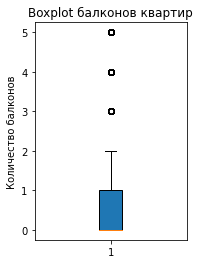

In [ ]:
# Построение boxplot
plt.subplot(1, 2, 2)
plt.boxplot(data['balcony'], vert=True, patch_artist=True)
plt.title('Boxplot балконов квартир')
plt.ylabel('Количество балконов')

Удалим выбросы у балконов.

In [ ]:
data = data[data['balcony'] < 3]

Text(0.5, 1.0, 'Количество комнат')

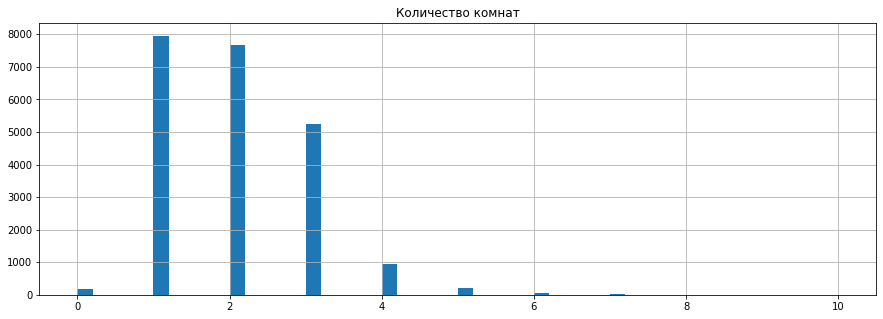

In [ ]:
data['rooms'].hist(bins=50, figsize=(15,5), range=(0,10))
plt.title('Количество комнат')

Из гистограмм следует, что больше объявлений о продаже 1-2 комнатных квартир.

Text(0, 0.5, 'Количество комнат')

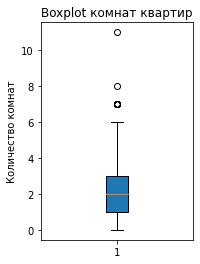

In [ ]:
# Построение boxplot
plt.subplot(1, 2, 2)
plt.boxplot(data['rooms'], vert=True, patch_artist=True)
plt.title('Boxplot комнат квартир')
plt.ylabel('Количество комнат')

Удалим выбросы.

In [ ]:
data = data[data['rooms'] < 7]

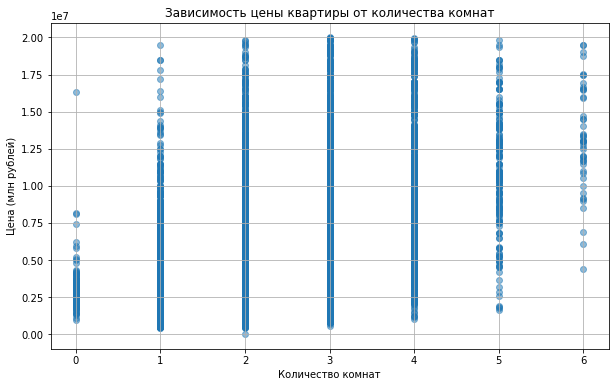

In [ ]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(data['rooms'], data['last_price'], alpha=0.5)
plt.title('Зависимость цены квартиры от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена (млн рублей)')
plt.grid(True)

# Отображение графика
plt.show()

In [ ]:
# Вычисление корреляции между количеством комнат и ценой
correlation = data['rooms'].corr(data['last_price'])

# Вывод результата
print(f'Корреляция между количеством комнат и ценой: {correlation}')

Корреляция между количеством комнат и ценой: 0.4966379194811637


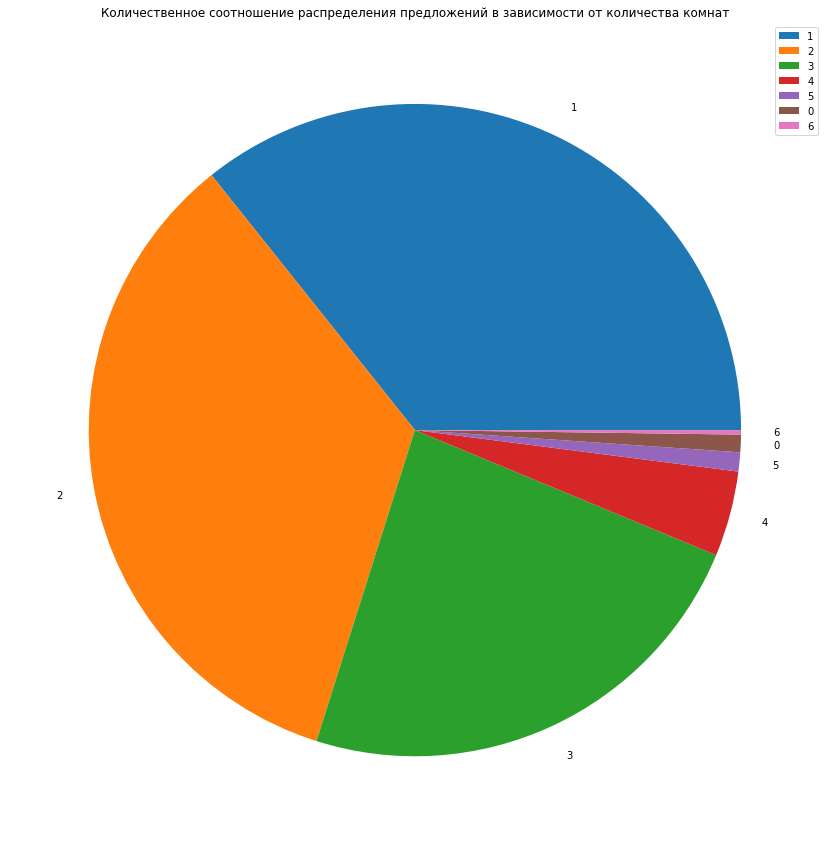

In [ ]:
pivot_table = data.pivot_table(index='rooms', values='last_price', aggfunc='count')
top_10 = pivot_table.sort_values(by='last_price', ascending=False).head(10)
top_10.plot.pie(y='last_price', figsize=(15,15), label='', title='Количественное соотношение распределения предложений в зависимости от количества комнат')
plt.show()

# Вывод
Существует зависимость между ценой и количеством комнат. График гистограммы отображает нормальное распределение. Квартиры до 4 комнат находятся в спросе. На квартиры с количеством комнат больше 4 маленький спрос и их гораздо меньше.

#### Высота потолков

In [ ]:
data['ceiling_height'].describe()

count    22250.000000
mean         2.685942
std          0.210814
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.000000
Name: ceiling_height, dtype: float64

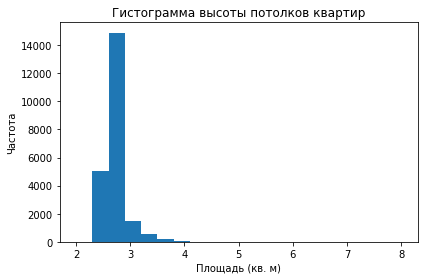

In [ ]:
plt.hist(data['ceiling_height'], bins=20)
plt.title('Гистограмма высоты потолков квартир')
plt.xlabel('Площадь (кв. м)')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Самой распространенной высотой потолка является 2.65 м.

Text(0, 0.5, 'Высоты потолков')

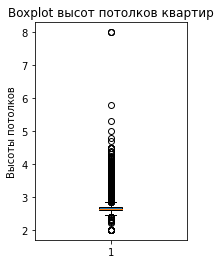

In [ ]:
# Построение boxplot
plt.subplot(1, 2, 2)
plt.boxplot(data['ceiling_height'], vert=True, patch_artist=True)
plt.title('Boxplot высот потолков квартир')
plt.ylabel('Высоты потолков')

Самым сильно отклоняющим от остальных значений является квартира с потолком 8 метров. Скорее всего это какой-то многоэтажный особняк.

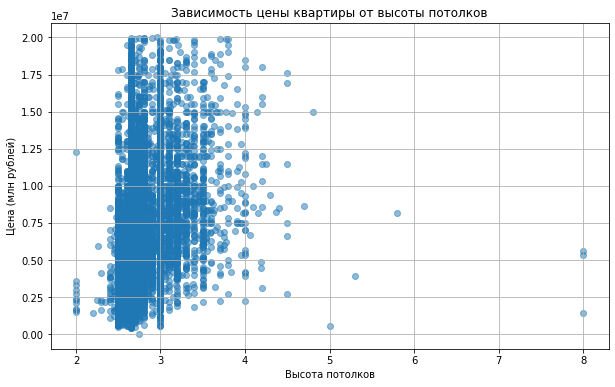

In [ ]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(data['ceiling_height'], data['last_price'], alpha=0.5)
plt.title('Зависимость цены квартиры от высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Цена (млн рублей)')
plt.grid(True)

# Отображение графика
plt.show()

In [ ]:
# Вычисление корреляции между  высотой потолков  и ценой
correlation = data['ceiling_height'].corr(data['last_price'])

# Вывод результата
print(f'Корреляция между высотой потолков и ценой: {correlation}')

Корреляция между высотой потолков и ценой: 0.3904810127093202


# Вывод
   Наиболее дорогая недвижимость с высотой потолков до 3 метров,выше 3 метров мало квартир, и стоят они меньше медианной цены.

#### Тип этажа квартиры («первый», «последний», «другой»);

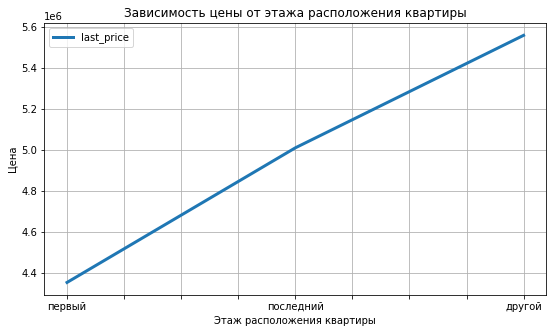

In [ ]:
(data
     .pivot_table(index='floor_type', values='last_price').sort_values(by='last_price', ascending=True)
     .plot(grid=True, figsize=(9, 5),linewidth=3, title='Зависимость цены от этажа расположения квартиры')
)
plt.xlabel('Этаж расположения квартиры')
plt.ylabel('Цена')
plt.show()

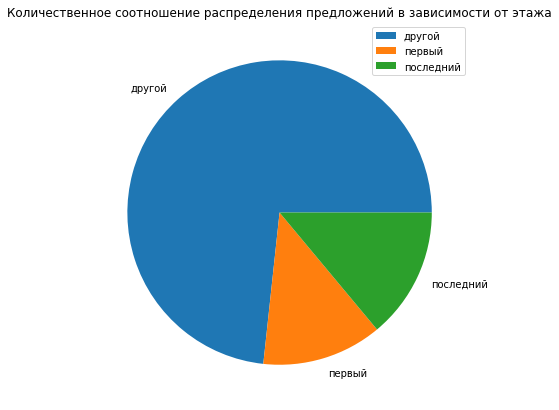

In [ ]:
data.pivot_table(index='floor_type',values='last_price',aggfunc='count').plot.pie(y='last_price', figsize=(7,7), label='', title='Количественное соотношение распределения предложений в зависимости от этажа')
plt.show()

# Вывод:
Большинство квартир относятся к типу другой, в меньшинстве находятся квартиры с первым этажом.

#### Общее количество этажей в доме.

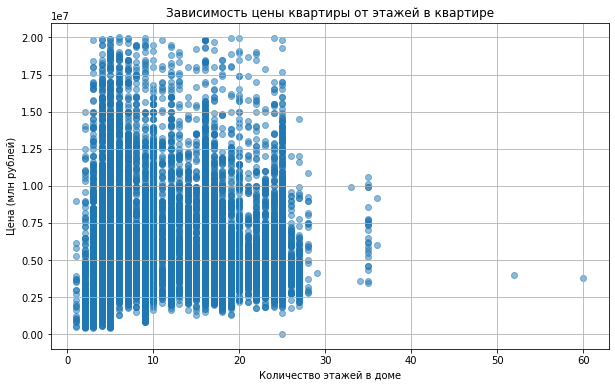

In [ ]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(data['floors_total'], data['last_price'], alpha=0.5)
plt.title('Зависимость цены квартиры от этажей в квартире')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Цена (млн рублей)')
plt.grid(True)

# Отображение графика
plt.show()

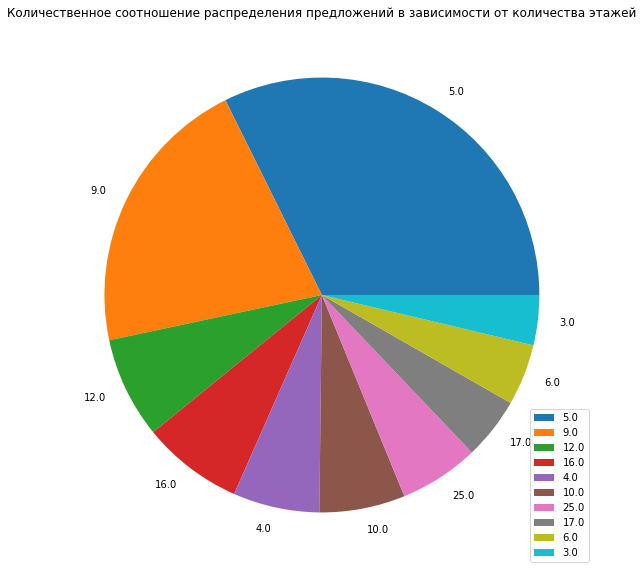

In [ ]:
pivot_table = data.pivot_table(index='floors_total', values='last_price', aggfunc='count')

top_10 = pivot_table.sort_values(by='last_price', ascending=False).head(10)
top_10.plot.pie(y='last_price', figsize=(10,10), label='', title='Количественное соотношение распределения предложений в зависимости от количества этажей')
plt.show()

# Вывод:
Большинство квартир находятся в 5 этажных зданиях и 9 этажных зданиях.

#### Расстояние до центра города в метрах

In [ ]:
data['city_centers_nearest'].describe()

count    16885.000000
mean     14500.523305
std       8593.156549
min        208.000000
25%       9819.000000
50%      13282.000000
75%      16453.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

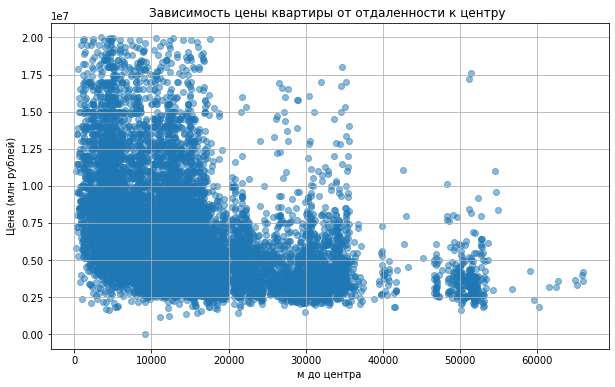

In [ ]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(data['city_centers_nearest'], data['last_price'], alpha=0.5)
plt.title('Зависимость цены квартиры от отдаленности к центру ')
plt.xlabel('м до центра')
plt.ylabel('Цена (млн рублей)')
plt.grid(True)

# Отображение графика
plt.show()

    Вывод:
    Чем ближе квартира находится к центру, тем дороже ее стоимость.

#### Расстояние до ближайшего парка

In [ ]:
data['parks_nearest'].describe()

count    7283.000000
mean      493.336537
std       341.628495
min         1.000000
25%       289.000000
50%       456.000000
75%       613.500000
max      3190.000000
Name: parks_nearest, dtype: float64

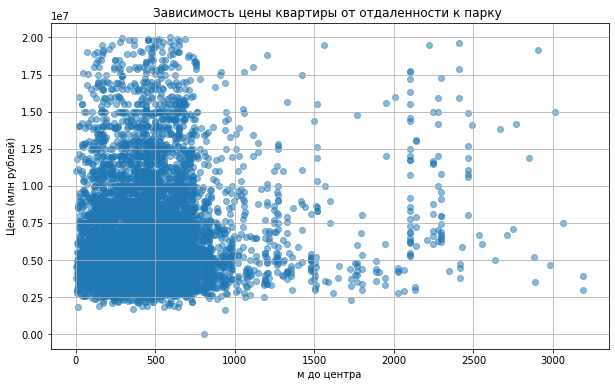

In [ ]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(data['parks_nearest'], data['last_price'], alpha=0.5)
plt.title('Зависимость цены квартиры от отдаленности к парку ')
plt.xlabel('м до центра')
plt.ylabel('Цена (млн рублей)')
plt.grid(True)

# Отображение графика
plt.show()

In [ ]:
# Вычисление корреляции между отдаленностью парка  и ценой
correlation = data['parks_nearest'].corr(data['last_price'])

# Вывод результата
print(f'Корреляция между отдаленностью парка и ценой: {correlation}')

Корреляция между отдаленностью парка и ценой: 0.061571193428411615


# Вывод:
Зависимости между отдаленностью до парка и ценой нет. Местоположение рядом с парком никак не влияет на стоимость, исходя из  данных датасета.

#### Изучим, как быстро продавались квартиры.

In [ ]:
data['days_exposition'].describe()

count    19393.000000
mean       177.369876
std        216.275546
min          1.000000
25%         44.000000
50%         93.000000
75%        226.000000
max       1553.000000
Name: days_exposition, dtype: float64

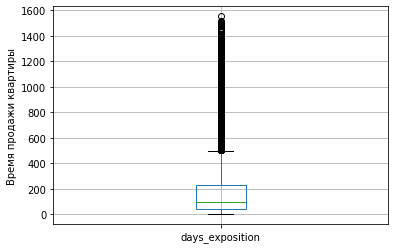

In [ ]:
data.boxplot('days_exposition')
plt.ylabel('Время продажи квартиры')
plt.show()

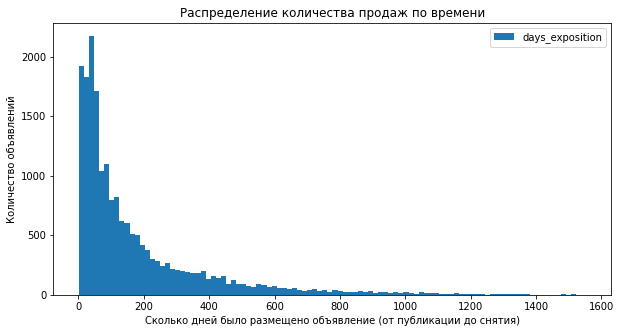

In [ ]:
data.plot(kind='hist',y='days_exposition',title='Распределение количества продаж по времени', bins=100, figsize=(10,5))

plt.xlabel('Сколько дней было размещено объявление (от публикации до снятия)')
plt.ylabel('Количество объявлений')
plt.show()

Медиана продаж 95 дней, квартиры, которые продаются за 95 дней продаются очень быстро. Большое количество  50 % всех квартир продавались меньше чем за 95 дней.

# Вывод:
    Квартиры, которые продавались меньше чем 95 дней, можно считать быстро проданными. Продажа квартир, которые была осуществлена более чем за 450 дней можно считать необычно долгой.

#### Изучим зависимость цены от даты размещения: дня недели, месяца и года.

День недели

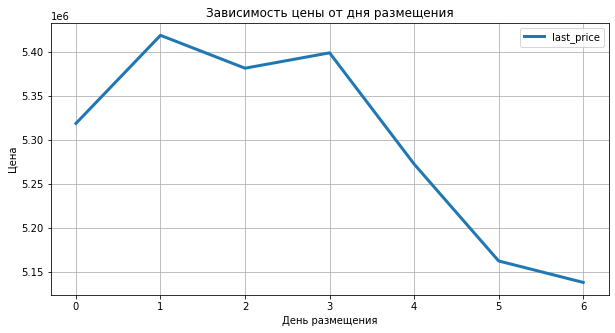

In [ ]:
(data

     .pivot_table(index='day_exposition', values=['last_price'])
     .plot(grid=True, figsize=(10, 5),linewidth=3,title='Зависимость цены от дня размещения')
)
plt.xlabel('День размещения')
plt.ylabel('Цена')

plt.show()

In [ ]:
# Вычисление корреляции между общей площадью и ценой
correlation = data['day_exposition'].corr(data['last_price'])

print(f'Корреляция между днем размещения квартиры и ценой: {correlation}')

Корреляция между днем размещения квартиры и ценой: -0.02048268622217407


Очень маленькая корреляция между днем размещения и ценой.

месяц

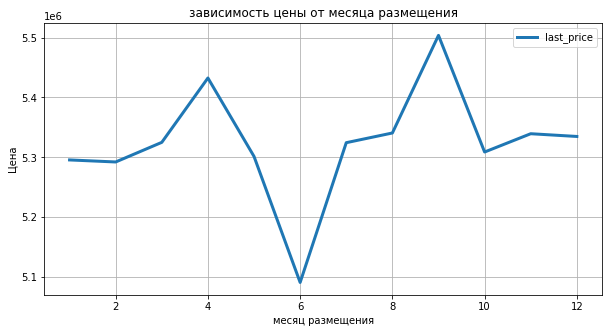

In [ ]:
(data

     .pivot_table(index='month_exposition', values=['last_price'])
     .plot(grid=True, figsize=(10, 5),linewidth=3,title='зависимость цены от месяца размещения')

)
plt.xlabel('месяц размещения')
plt.ylabel('Цена')

plt.show()

In [ ]:
# Вычисление корреляции между общей площадью и ценой
correlation = data['month_exposition'].corr(data['last_price'])

print(f'Корреляция между месяцем размещения квартиры и ценой: {correlation}')

Корреляция между месяцем размещения квартиры и ценой: 0.005048808864756463


Зависимость между месяцем размещения квартиры и ценой почти 0.

Год

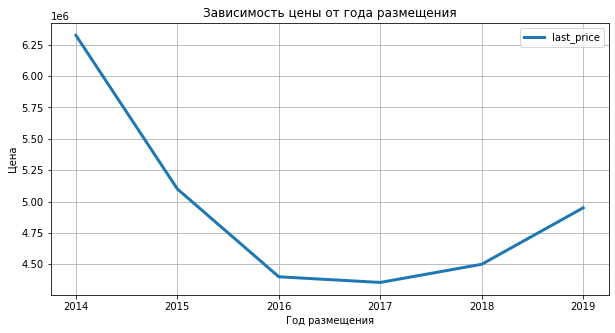

In [ ]:
(data

     .pivot_table(index='year_exposition', values=['last_price'], aggfunc='median')
     .plot(grid=True, figsize=(10, 5),linewidth=3,title='Зависимость цены от года размещения')

)
plt.xlabel('Год размещения')
plt.ylabel('Цена')

plt.show()

In [ ]:
# Вычисление корреляции между общей площадью и ценой
correlation = data['year_exposition'].corr(data['last_price'])

print(f'Корреляция между годом размещения квартиры и ценой: {correlation}')

Корреляция между годом размещения квартиры и ценой: -0.025777792328204877


С 2014 года цена на квартиры уменьшалась, с 2018 года стала увеличиваться.

#### Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построем графики, которые показывают зависимость цены от параметров:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - количество комнат;
  - тип этажа, на котором расположена квартира (первый, последний, другой);
  - дата размещения (день недели, месяц, год).

#####  Общая площадь

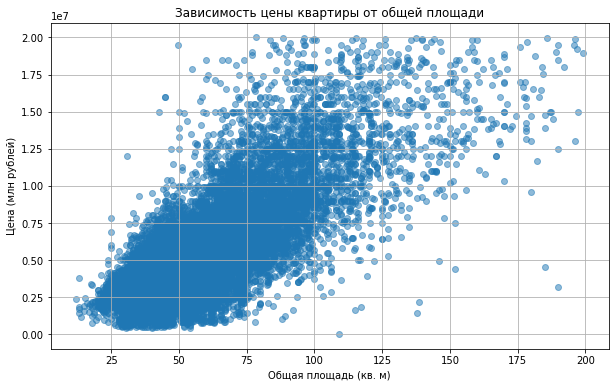

In [ ]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(data['total_area'], data['last_price'], alpha=0.5)
plt.title('Зависимость цены квартиры от общей площади')
plt.xlabel('Общая площадь (кв. м)')
plt.ylabel('Цена (млн рублей)')
plt.grid(True)

# Отображение графика
plt.show()

In [ ]:
# Вычисление корреляции между общей площадью и ценой
correlation = data['total_area'].corr(data['last_price'])

# Вывод результата
print(f'Корреляция между общей площадью и ценой: {correlation}')

Корреляция между общей площадью и ценой: 0.7707809936580408


# Вывод:
Исходя из графиков, можно сделать вывод о том, что между ценой квартир и их площадью существует определенная связь: чем больше площадь недвижимости в квадратных метрах, тем выше её стоимость. Этот вывод подкрепляется высоким коэффициентом корреляции.

##### Жилая площадь

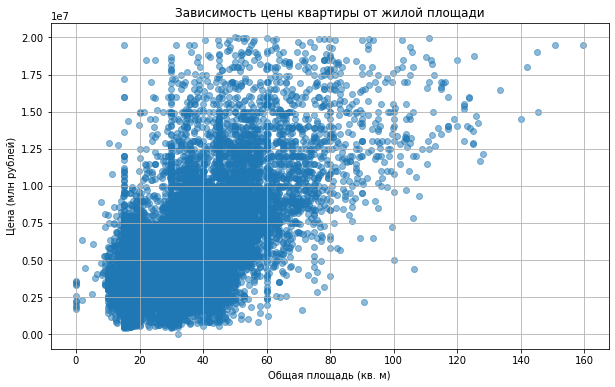

In [ ]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(data['living_area'], data['last_price'], alpha=0.5)
plt.title('Зависимость цены квартиры от жилой площади')
plt.xlabel('Общая площадь (кв. м)')
plt.ylabel('Цена (млн рублей)')
plt.grid(True)

# Отображение графика
plt.show()

In [ ]:
# Вычисление корреляции между общей площадью и ценой
correlation = data['living_area'].corr(data['last_price'])

print(f'Корреляция между жилой площадью и ценой: {correlation}')

Корреляция между жилой площадью и ценой: 0.6381341428629026


# Вывод
На основании графиков можно утверждать, что существует взаимосвязь между ценой квартир и их жилой площадью. Увеличение жилой площади в квадратных метрах обычно сопровождается ростом стоимости. Этот вывод поддерживается значительным коэффициентом корреляции.

##### Площадь кухни

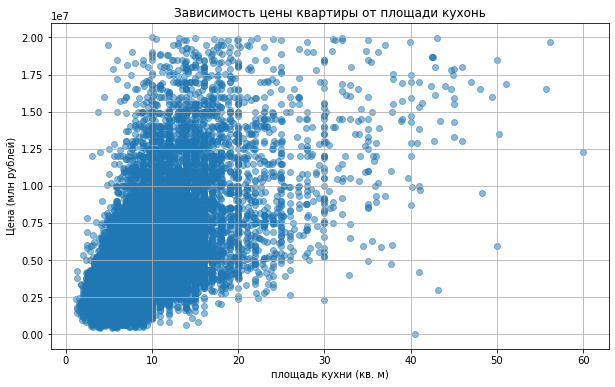

In [ ]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(data['kitchen_area'], data['last_price'], alpha=0.5)
plt.title('Зависимость цены квартиры от площади кухонь')
plt.xlabel('площадь кухни (кв. м)')
plt.ylabel('Цена (млн рублей)')
plt.grid(True)

# Отображение графика
plt.show()

In [ ]:
# Вычисление корреляции между  площадью кухни  и ценой
correlation = data['kitchen_area'].corr(data['last_price'])

print(f'Корреляция между площадью кухни и ценой: {correlation}')

Корреляция между площадью кухни и ценой: 0.5642194249752507


# Вывод
Существует зависимость между площадью кухни и ценой за квартиры. Это подтверждает достаточно высокий коэффицент корреляции. Так как площадь кухни влияет на общую площадь квартиры. Так как в большинстве случаев, если кухня достаточно большая, то и квартира тоже.

##### Количество комнат

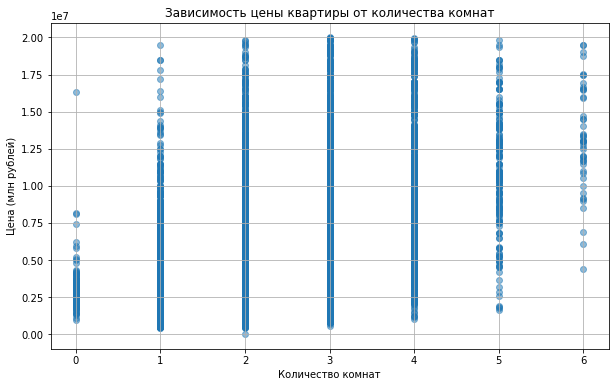

In [ ]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(data['rooms'], data['last_price'], alpha=0.5)
plt.title('Зависимость цены квартиры от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена (млн рублей)')
plt.grid(True)

# Отображение графика
plt.show()

In [ ]:
# Вычисление корреляции между количеством комнат и ценой
correlation = data['rooms'].corr(data['last_price'])

# Вывод результата
print(f'Корреляция между количеством комнат и ценой: {correlation}')

Корреляция между количеством комнат и ценой: 0.4966379194811637


# Вывод:
Также существует зависимость между количеством комнат и ценой. Чем больше количество комнат, тем дороже квартира.

##### Этаж, на котором расположена квартира.

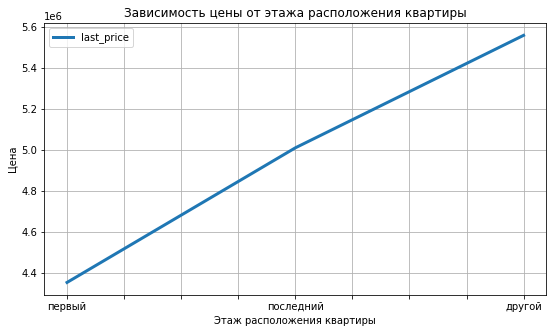

In [ ]:
(data
     .pivot_table(index='floor_type', values='last_price').sort_values(by='last_price', ascending=True)
     .plot(grid=True, figsize=(9, 5),linewidth=3, title='Зависимость цены от этажа расположения квартиры')
)
plt.xlabel('Этаж расположения квартиры')
plt.ylabel('Цена')
plt.show()

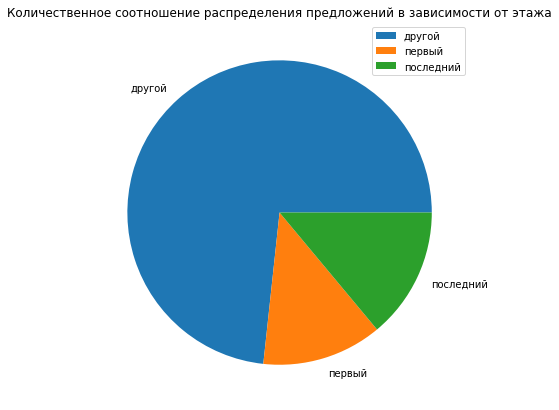

In [ ]:
data.pivot_table(index='floor_type',values='last_price',aggfunc='count').plot.pie(y='last_price', figsize=(7,7), label='', title='Количественное соотношение распределения предложений в зависимости от этажа')
plt.show()

# Вывод:
Наиболее большая цена у квартир, у которых этаж другой. Квартиры с первым и последним этажом дешевле.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Средняя цена одного квадратного метра: 82716.42
Населённый пункт с самой высокой ценой: санкт-петербург (Цена за м²: 108546.18)
Населённый пункт с самой низкой ценой: деревня вахнова кара (Цена за м²: 11688.00)


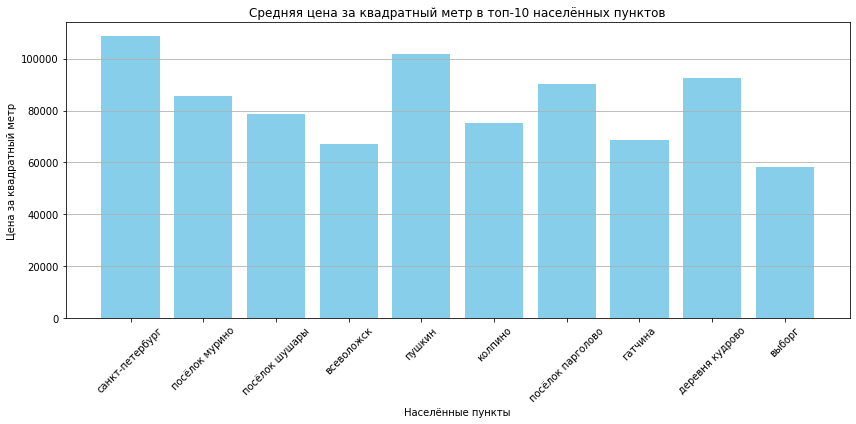

In [ ]:
# Группировка по населённым пунктам и подсчёт количества объявлений
city_counts = data['locality_name'].value_counts().reset_index()
city_counts.columns = ['locality_name', 'count']

merged_data = pd.merge(city_counts, data[['locality_name', 'square_meter_price']], on='locality_name')

# Получение 10 населённых пунктов с наибольшим и наименьшим количеством объявлений
top_cities = merged_data.groupby('locality_name').agg({'count': 'first', 'square_meter_price': 'mean'}).nlargest(10, 'count')
min_cities = merged_data.groupby('locality_name').agg({'count': 'first', 'square_meter_price': 'mean'}).nsmallest(10, 'count')
# Рассчёт средней цены за квадратный метр
average_price = top_cities['square_meter_price'].mean()

# Определение населённого пункта с самой высокой и самой низкой ценой
highest_price_city = top_cities.loc[top_cities['square_meter_price'].idxmax()]
lowest_price_city_top_10 = top_cities.loc[top_cities['square_meter_price'].idxmin()]
lowest_price_city = min_cities.loc[min_cities['square_meter_price'].idxmin()]
print("Средняя цена одного квадратного метра: {:.2f}".format(average_price))
print("Населённый пункт с самой высокой ценой: {} (Цена за м²: {:.2f})".format(highest_price_city.name, highest_price_city.square_meter_price))
print("Населённый пункт с самой низкой ценой: {} (Цена за м²: {:.2f})".format(lowest_price_city.name, lowest_price_city.square_meter_price))

# Построение гистограммы
plt.figure(figsize=(12, 6))
plt.bar(top_cities.index, top_cities['square_meter_price'], color='skyblue')
plt.xticks(top_cities.index, top_cities.index, rotation=45)
plt.title('Средняя цена за квадратный метр в топ-10 населённых пунктов')
plt.xlabel('Населённые пункты')
plt.ylabel('Цена за квадратный метр')
plt.grid(axis='y')

# Показать гистограмму
plt.tight_layout()
plt.show()

# Вывод:
Населенный пункт  с самой высокой ценой: Санкт-Петербург. Населенный пункт с самой низкой ценой за кв.м это деревня Вахнова Кара.

#### Выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим  их среднюю стоимость на разном удалении от центра:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.

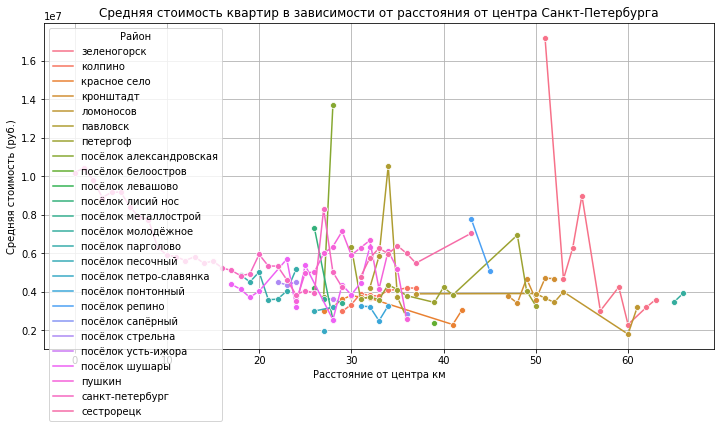

In [ ]:
import seaborn as sns
# Группировка и расчет средней стоимости
average_prices = data.groupby(['locality_name', 'distance_km']).agg({'last_price': 'mean'}).reset_index()
# Построение графика
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_prices, x='distance_km', y='last_price', hue='locality_name', marker='o')
plt.title('Средняя стоимость квартир в зависимости от расстояния от центра Санкт-Петербурга')
plt.xlabel('Расстояние от центра км')
plt.ylabel('Средняя стоимость (руб.)')
plt.legend(title='Район')
plt.grid()
plt.show()

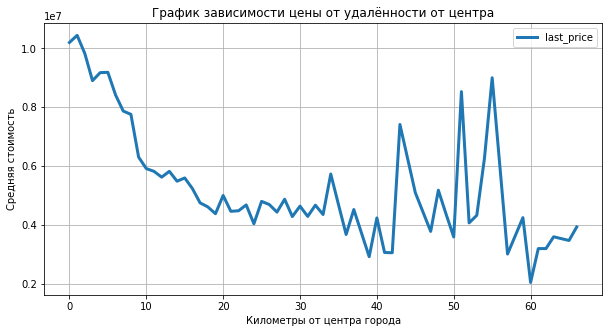

In [ ]:
average_prices.pivot_table(index='distance_km', values='last_price', aggfunc='mean').plot(figsize=(10,5), grid=True, linewidth=3, title='График зависимости цены от удалённости от центра')
plt.xlabel('Километры от центра города')
plt.ylabel('Средняя стоимость')
plt.show()

In [ ]:
# Группировка по расстоянию и вычисление средней стоимости
data['distance_group'] = (data['distance_km'] // 1) # Группировка по километрам
average_prices = data.groupby('distance_group')['last_price'].mean().reset_index()
display(average_prices)

,distance_group,last_price
0,0.0,1.019857e+07
1,1.0,1.044039e+07
2,2.0,9.825327e+06
3,3.0,8.901579e+06
4,4.0,9.174623e+06
...,...,...
56,61.0,3.200000e+06
57,62.0,3.200000e+06
58,63.0,3.600000e+06
59,65.0,3.475000e+06


# Вывод:
   Самая дорогая недвижимость находится в районе 10 км от центра Санкт-Петербурга.

### Общий вывод

В процессе подготовки данных к анализу столкнулись с значительным количеством пропусков в таблице, что могло повлиять на  исследовательский анализ. Для минимизации потерь  заполнили некоторые данные средними значениями или медианами, другие данные оставили без изменений, например, количество этажей во всем здании. Результаты работы по обработке и анализу недостающих данных подчеркивают необходимость проверять корректность выгрузки данных из системы. Ошибки, связанные с человеческим фактором, были минимальны, что значительно упростило предобработку материала для анализа.Были устранены неявные дубликаты в названиях населённых пунктов.

После очистки датасета от аномалий был проведен ряд операций: подсчитали среднюю стоимость квадратного метра жилья, стоимость каждого километра удаления от центра, собрали статистику по скорости продажи объявлений с момента их размещения, также был добавлен тип этажа: первый, другой, последний.

Для лучшей визуализации результатов анализа использовали графики,гистограммы.Санкт-Петербург является лидером по количеству объявлений о продаже недвижимости.  При этом покупатели предпочитают квартиры на любом этаже, кроме первого и последнего, чаще всего в 5-этажных и 9-этажных зданиях.

В итоге можно сделать вывод, что рыночная цена квартир зависит от местоложения, наиболее дорогие квартиры находятся  в Санкт-Петербурге со средней стоимостью около 115 тыс. рублей за квадратный метр, высотой потолков меньше 3 метров, не на последнем и не на первом этаже. Цена зависит от расположения квартиры, на первых и последних этажах квартиры стоят дешевле. Наиболее популярны однокомнатные, двухкомнатные и трехкомнатные квартиры. 50 % квартир были проданы за чуть больше 3 месяцев с появления объявления о продаже.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.